In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
from sklearn.ensemble import RandomForestClassifier

drive.mount('/content/drive')
#to everyone - go to kaggle profile - settings - account - scroll down to api and download api
#upload this file to your google drive just in your Colab Notebooks folder so the file pathing works

Mounted at /content/drive


In [2]:
!mkdir -p ~/.kaggle
!cp /content/drive/MyDrive/Colab\ Notebooks/kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [3]:
!pip install kaggle
!kaggle competitions download -c titanic
!unzip titanic.zip

  0% 0.00/34.1k [00:00<?, ?B/s]
100% 34.1k/34.1k [00:00<00:00, 141MB/s]
Archive:  titanic.zip
  inflating: gender_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


We could use lasso feature selection? I'm thinking we need to take some ti

yeah we can do feature engineering and get a better understanding of what features would actually be useful for the model

### **Data Dictionary**

*   Survived : Survival, 0 = No, 1 = Yes
Pclass : Ticket class, 1 = 1st, 2 = 2nd, 3 = 3rd
* Pclass : Ticket class, 1 = 1st, 2 = 2nd, 3 = 3rd
* Sex : Sex
* Age: Age in years
* SibSp: Number of siblings / spouses aboard the Titanic
*   Parch: Number of parents / children aboard the Titanic
*  Ticket: Ticket number
*   Fare: Passenger fare
*   Cabin: Cabin number
*  Embarked: Part of Embarkation, C = Cherbourg, Q = Queenstown, S = Southampton

Variable Notes

*   Pclass: A proxy for socio-economic status (SES) 1st = Upper 2nd = Middle 3rd = Lower
*  Age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5
*   SibSp: The number of siblings/spouses
*   Parch: The number of parents/children

Some children travelled only with a nanny, therefore parch=0 for them.


In [4]:
df_train = pd.read_csv("train.csv")
df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [5]:
df_test = pd.read_csv("test.csv")
df_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [6]:
# example of what a submission file should look like
df_gender_submission = pd.read_csv("gender_submission.csv")
df_gender_submission

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [7]:
df_train.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [8]:
#0) visualize data/determine what features are best to use
#1) identify/fill/drop missing vals
#2) feature engineering --> encode categorical features
#3) define features and labels
#4) split for validation
#5) fit a model (we can decide what model to use)
#6) predcit using the model

In [9]:
# one possible feature we can use is P-class since there's a
# correlation between socio-economic status and survival
num_survived_pclass = df_train.groupby("Pclass")["Survived"].value_counts().unstack()
num_survived_pclass

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


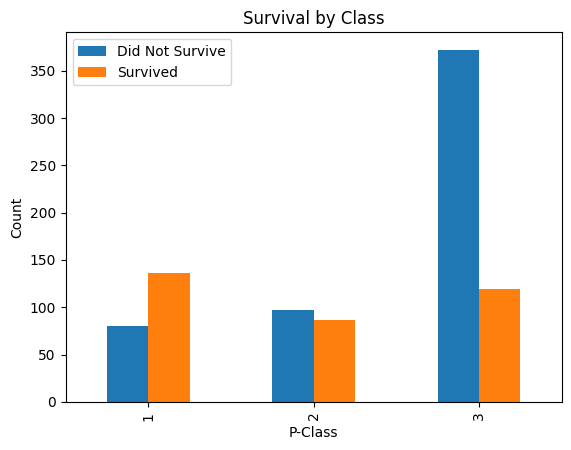

In [10]:
num_survived_pclass.plot(kind="bar")
plt.xlabel("P-Class")
plt.ylabel("Count")
plt.title("Survival by Class")
plt.legend(["Did Not Survive", "Survived"])
plt.show()


In [11]:
df_train.groupby("Sex")["Survived"].value_counts().unstack()


Survived,0,1
Sex,,
female,81,233
male,468,109


In [12]:
df_train.groupby("Age")["Survived"].value_counts().unstack()


Survived,0,1
Age,,
0.42,NaN,1.0
0.67,NaN,1.0
0.75,NaN,2.0
0.83,NaN,2.0
0.92,NaN,1.0
...,...,...
70.00,2.0,NaN
70.50,1.0,NaN
71.00,2.0,NaN


In [13]:
df_train.groupby("SibSp")["Survived"].value_counts().unstack()


Survived,0,1
SibSp,,
0,398.0,210.0
1,97.0,112.0
2,15.0,13.0
3,12.0,4.0
4,15.0,3.0
5,5.0,NaN
8,7.0,NaN


In [14]:
df_train.groupby("Parch")["Survived"].value_counts().unstack()


Survived,0,1
Parch,,
0,445.0,233.0
1,53.0,65.0
2,40.0,40.0
3,2.0,3.0
4,4.0,NaN
5,4.0,1.0
6,1.0,NaN


In [15]:
df_train.groupby("Ticket")["Survived"].value_counts().unstack()


Survived,0,1
Ticket,,
110152,NaN,3.0
110413,1.0,2.0
110465,2.0,NaN
110564,NaN,1.0
110813,NaN,1.0
...,...,...
W./C. 6608,4.0,NaN
W./C. 6609,1.0,NaN
W.E.P. 5734,1.0,NaN


In [16]:

df_train.groupby("Fare")["Survived"].value_counts().unstack()


Survived,0,1
Fare,,
0.0000,14.0,1.0
4.0125,1.0,NaN
5.0000,1.0,NaN
6.2375,1.0,NaN
6.4375,1.0,NaN
...,...,...
227.5250,1.0,3.0
247.5208,1.0,1.0
262.3750,NaN,2.0


In [17]:
df_train.groupby("Cabin")["Survived"].value_counts().unstack()


Survived,0,1
Cabin,,
A10,1.0,NaN
A14,1.0,NaN
A16,NaN,1.0
A19,1.0,NaN
A20,NaN,1.0
...,...,...
F33,NaN,3.0
F38,1.0,NaN
F4,NaN,2.0


In [18]:
df_train.groupby("Embarked")["Survived"].value_counts().unstack()


Survived,0,1
Embarked,,
C,75,93
Q,47,30
S,427,217


In [19]:
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split, cross_val_score

In [20]:
train = df_train.copy()
test = df_test.copy()

In [21]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [22]:
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [23]:
# check missing values in the train dataset
train.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [24]:
 # dealing with missing values

median_age_train = train["Age"].median()
median_age_test = test["Age"].median()
median_fare_test = test["Fare"].median()
train["Age"] = train["Age"].fillna(median_age_train)
test["Age"] = test["Age"].fillna(median_age_test)
test["Fare"] = test["Fare"].fillna(median_fare_test)

mode_embarked_train = train["Embarked"].mode()[0]
train["Embarked"] = train["Embarked"].fillna(mode_embarked_train)


In [25]:
# 1) Title from Name
for df in [train, test]:
    df['Title'] = df['Name'].str.extract(r' ([A-Za-z]+)\.', expand=False)
    df['Title'] = df['Title'].replace({
        'Mlle':'Miss','Ms':'Miss','Mme':'Mrs','Lady':'Rare','Countess':'Rare',
        'Sir':'Rare','Jonkheer':'Rare','Dona':'Rare','Don':'Rare','Rev':'Rare',
        'Col':'Rare','Major':'Rare','Capt':'Rare','Dr':'Rare'})

# 2) Family features
for df in [train, test]:
    df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
    df['IsAlone'] = (df['FamilySize'] == 1).astype(int)

# 3) Fare per person
for df in [train, test]:
    df['FarePerPerson'] = df['Fare'] / df['FamilySize']

# 4) Cabin letter
for df in [train, test]:
    df['CabinLetter'] = df['Cabin'].astype(str).str[0]
    df['CabinLetter'] = df['CabinLetter'].replace({'n': 'U'})

# 5) Age bands
for df in [train, test]:
    df['AgeBand'] = pd.cut(df['Age'],
                           bins=[-0.01,16,26,36,62,100],
                           labels=['0-16','17-26','27-36','37-62','63+'])

for df in [train, test]:
    df['Sex_num'] = (df['Sex'] == 'male').astype(int)
    df['Sex_Pclass'] = df['Sex_num'] * df['Pclass']

In [26]:
# check missing values again
train.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [27]:
test.isnull().sum()

,0
PassengerId,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0
Cabin,327


In [28]:
# use LabelEncoder to encode categorical columns
#encoder = LabelEncoder()

#train["Sex"] = encoder.fit_transform(train["Sex"])
#test["Sex"] = encoder.transform(test["Sex"])
#train["Embarked"] = encoder.fit_transform(train["Embarked"])
#test["Embarked"] = encoder.transform(test["Embarked"])

In [29]:
# columns to onehot
cat_cols = ['Embarked','Title','CabinLetter','AgeBand']
num_cols = ['Pclass','Age','Fare','SibSp','Parch','FamilySize',
            'IsAlone','FarePerPerson','Sex_num','Sex_Pclass']

# Make a copy to avoid confusion
train_fe = train[['Survived','PassengerId'] + cat_cols + num_cols].copy()
test_fe  = test[['PassengerId'] + cat_cols + num_cols].copy()

train_dum = pd.get_dummies(train_fe, columns=cat_cols, drop_first=True)
test_dum  = pd.get_dummies(test_fe,  columns=cat_cols, drop_first=True)
train_dum, test_dum = train_dum.align(test_dum,
                                      join='left', axis=1, fill_value=0)
X = train_dum.drop(columns=['Survived'])
y = train_dum['Survived']
X_test = test_dum.copy()

In [30]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize,IsAlone,FarePerPerson,CabinLetter,AgeBand,Sex_num,Sex_Pclass
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,2,0,3.62500,U,17-26,1,3
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2,0,35.64165,C,37-62,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,1,1,7.92500,U,17-26,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,2,0,26.55000,C,27-36,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,1,1,8.05000,U,27-36,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,Rare,1,1,13.00000,U,27-36,1,2
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,Miss,1,1,30.00000,B,17-26,0,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,NaN,S,Miss,4,0,5.86250,U,27-36,0,0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,Mr,1,1,30.00000,C,17-26,1,1


In [31]:
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize,IsAlone,FarePerPerson,CabinLetter,AgeBand,Sex_num,Sex_Pclass
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,Mr,1,1,7.829200,U,27-36,1,3
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,Mrs,2,0,3.500000,U,37-62,0,0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,Mr,1,1,9.687500,U,37-62,1,2
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,Mr,1,1,8.662500,U,27-36,1,3
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,Mrs,3,0,4.095833,U,17-26,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,27.0,0,0,A.5. 3236,8.0500,NaN,S,Mr,1,1,8.050000,U,27-36,1,3
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,Rare,1,1,108.900000,C,37-62,0,0
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,Mr,1,1,7.250000,U,37-62,1,3
416,1308,3,"Ware, Mr. Frederick",male,27.0,0,0,359309,8.0500,NaN,S,Mr,1,1,8.050000,U,27-36,1,3


In [32]:
# train the model
#model = DecisionTreeClassifier(max_depth=5, random_state=42)
#model.fit(X, y)

#train_predict = model.predict(X)
#accuracy = accuracy_score(y, train_predict)
#print("Accuracy Score:", accuracy)

CURRENT BEST METHOD


In [33]:
for df in [train, test]:
    df['Sex_num'] = (df['Sex'] == 'male').astype(int)
    df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
    df['IsAlone'] = (df['FamilySize'] == 1).astype(int)
    df['Sex_Pclass'] = df['Sex_num'] * df['Pclass']
    df['Title'] = df['Name'].str.extract(r' ([A-Za-z]+)\.', expand=False)
    df['Title'] = df['Title'].replace({
        'Mlle':'Miss','Ms':'Miss','Mme':'Mrs','Lady':'Rare','Countess':'Rare',
        'Sir':'Rare','Jonkheer':'Rare','Dona':'Rare','Don':'Rare','Rev':'Rare',
        'Col':'Rare','Major':'Rare','Capt':'Rare','Dr':'Rare'})
    df['FareLog'] = np.log1p(df['Fare'])

#onehot encode here
cat_cols = ['Embarked','Title']
num_cols = ['Pclass','Age','FareLog',
            'SibSp','Parch','FamilySize','IsAlone','Sex_num','Sex_Pclass']
train_fe = train[['Survived','PassengerId'] + cat_cols + num_cols].copy()
test_fe  = test[['PassengerId'] + cat_cols + num_cols].copy()
train_dum = pd.get_dummies(train_fe, columns=cat_cols, drop_first=True)
test_dum  = pd.get_dummies(test_fe,  columns=cat_cols, drop_first=True)
train_dum, test_dum = train_dum.align(test_dum, join='left', axis=1, fill_value=0)

X = train_dum.drop(columns=['Survived'])
y = train_dum['Survived'].values
X_test = test_dum.reindex(columns=X.columns, fill_value=0)

rf_best = RandomForestClassifier(n_estimators=1200,
    max_depth=9, min_samples_split=4, min_samples_leaf=5,
    max_features='sqrt', bootstrap=True,
    random_state=42, n_jobs=-1)#best

rf_best.fit(X, y)
test_pred_proba = rf_best.predict_proba(X_test)[:, 1]
test_labels = (test_pred_proba >= 0.475).astype(int)




submission = pd.DataFrame({"PassengerId": test["PassengerId"], "Survived": test_labels})
submission.to_csv("rf_final_best.csv", index=False)
print(submission.head())


   PassengerId  Survived
0          892         0
1          893         1
2          894         0
3          895         0
4          896         1


In [34]:
from google.colab import files
files.download("rf_final_best.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>